# ARIMA Models With R

In [1]:
#get working directory
getwd()


[1] "C:/Users/mnf13"

In [3]:
#set working directory
setwd("C:/Users/mnf13/RM")

In [4]:
#Upload data
BMW<-read.csv("BMW.csv", header=TRUE)

In [5]:
head(BMW)

Years,Prices
06/11/1995,11.984
07/11/1995,12.000
08/11/1995,12.158
09/11/1995,12.316
10/11/1995,12.221
13/11/1995,12.221


# Time Plot to check stationarity

In [ ]:
install.packages("PerformanceAnalytics")

In [7]:
library (PerformanceAnalytics)

In [12]:
#set timeseries element
BMW$Years <- as.Date(BMW$Years, "%d/%m/%Y")
class(BMW$Years)
BMW.z = zoo(x=BMW$Prices, order.by=BMW$Years)

[1] "Date"

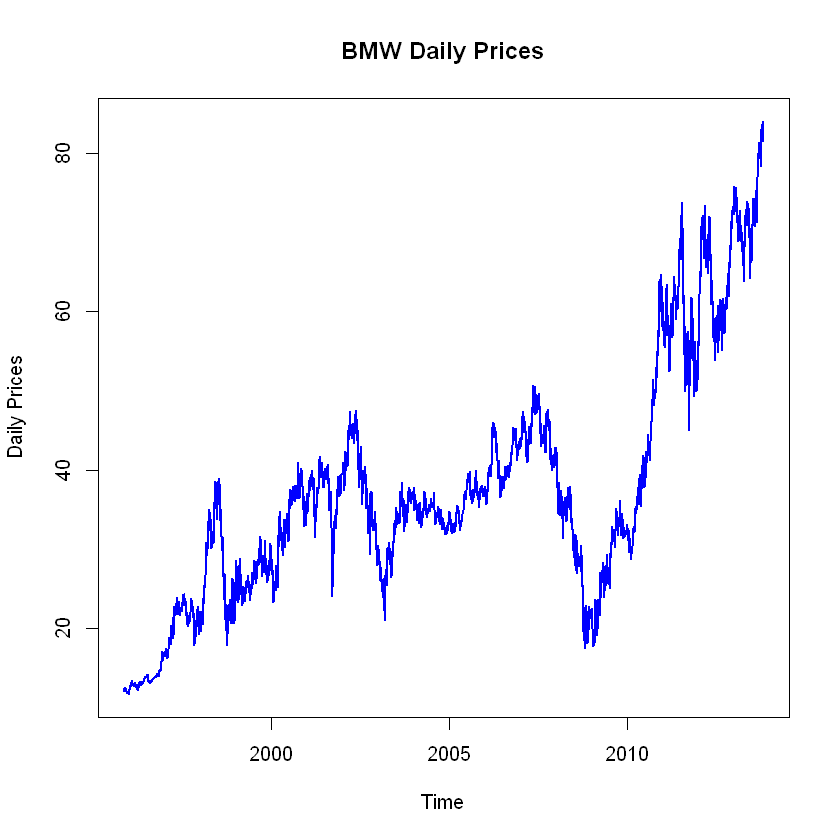

In [14]:
plot.zoo(BMW.z, main = "BMW Daily Prices", xlab =
         "Time", ylab = "Daily Prices", lwd = 2, col = "blue")

# 1. Stationarity Test

### 1. ADF Unit-Root Test/Stationry test.

#### H0: Data is not staionary

#### H1: Data is Staionary

In [15]:
install.packages("tseries")


  There is a binary version available but the source version is later:
         binary  source needs_compilation
tseries 0.10-48 0.10-52              TRUE

  Binaries will be installed
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mnf13\AppData\Local\Temp\RtmpOyF0mM\downloaded_packages


In [16]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [21]:
#ADF test
adf.test(BMW$Prices, alternative = c("stationary"),
 k = trunc((length(BMW$Prices)-1)^(1/3)))


	Augmented Dickey-Fuller Test

data:  BMW$Prices
Dickey-Fuller = -2.0092, Lag order = 16, p-value = 0.5745
alternative hypothesis: stationary


#### As p value is 0.5745 and that is more than 0.05.We accept Null Hypothesis. So our data is not staionary.

### 2. Phillips-Perron Unit Root Test

In [22]:
PP.test(BMW$Prices)


	Phillips-Perron Unit Root Test

data:  BMW$Prices
Dickey-Fuller = -2.1476, Truncation lag parameter = 10, p-value =
0.5158


#### As p value is 0.5158 and that is more than 0.05.We accept Null Hypothesis. So our data is not staionary.


# 2. Autocorrelation test

### ACF and PACF Plots

Total Correlation Chart (also known as Auto – correlation Function / ACF help us determine what type of series we have, whether it is a White noise, Random walk, Auto regressive or
Moving average.


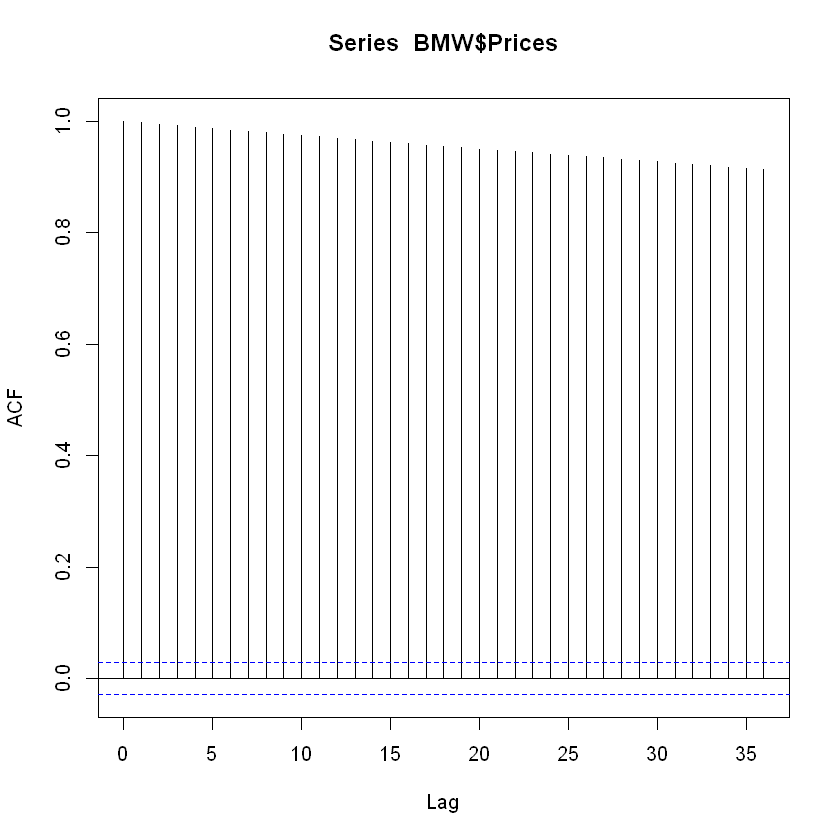

In [24]:
#ACF plot
acf(BMW$Prices)


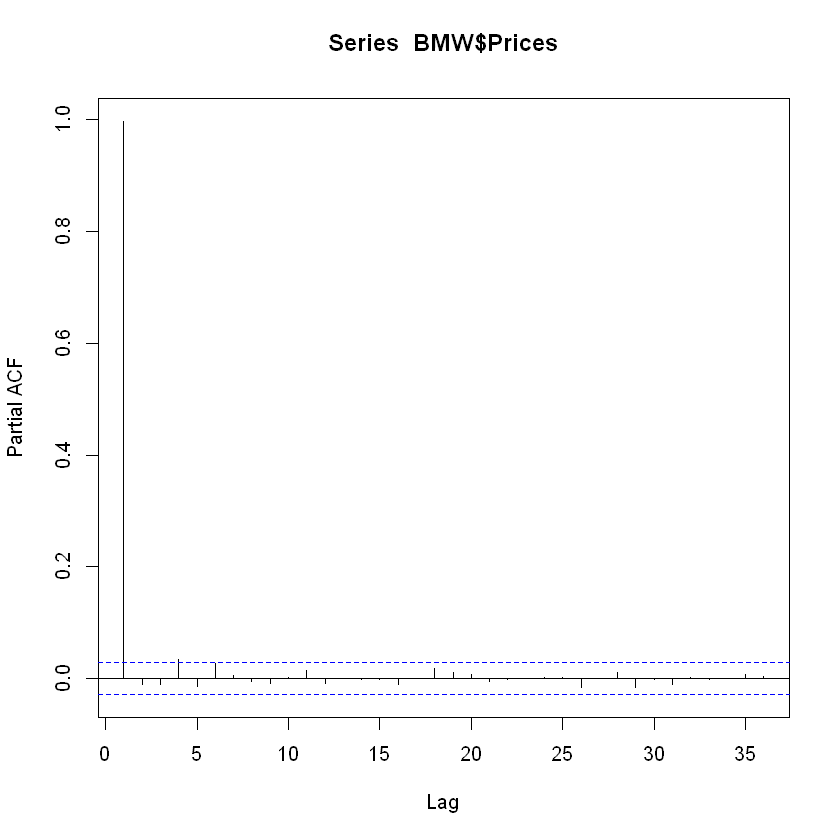

In [25]:
#PACF Plot
pacf(BMW$Prices)

## Ljung–Box test

#### H0: The data are independently distributed (no auto correlation)

#### H1: The data are not independently distributed.

#### If p<0.05 reject null hypothesis.

In [26]:
Box.test(BMW$Prices, lag = 20, type = c("Ljung-Box"), fitdf = 0)


	Box-Ljung test

data:  BMW$Prices
X-squared = 89268, df = 20, p-value < 2.2e-16


#### As p-values is 2.2e-16<0.05, we reject null hypothesis, thus our data has Autocorrelation.

# 3. Convert Data Into a Staionary/First Differnece

One way to do this is via differencing or in other words calculate Returns of stock prices.

To calculate Returns of stock prices.

In [27]:
Return <- c(diff(log(BMW$Prices),1))

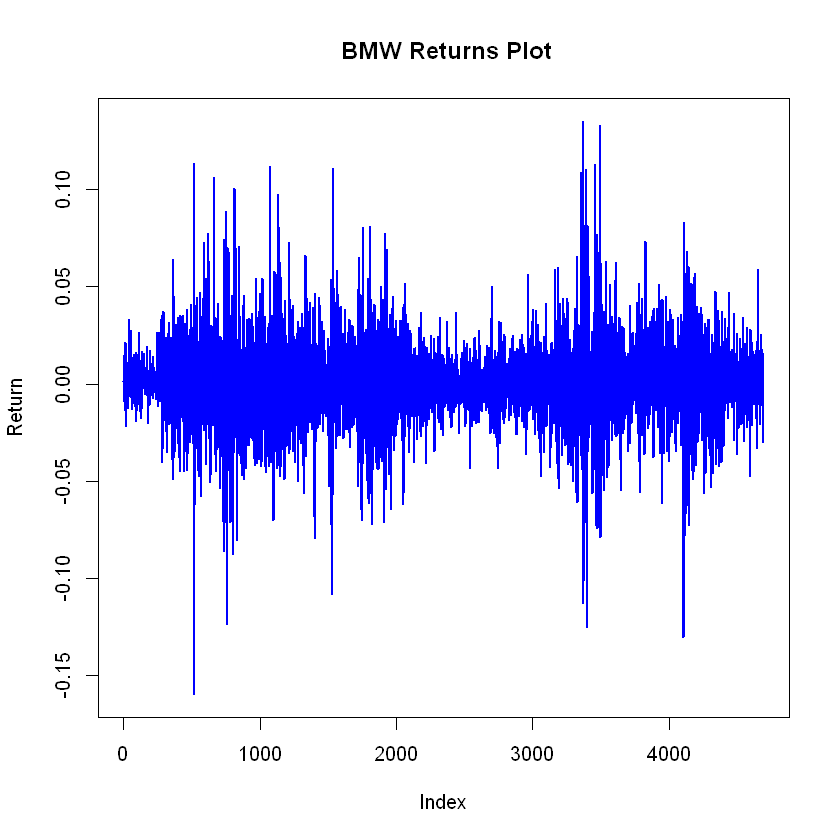

In [28]:
plot.zoo(Return,main = " BMW Returns Plot", lwd = 2, col = "blue")

Our data is weak Staionary.

### WE will plot ACF and PACF of stationary data

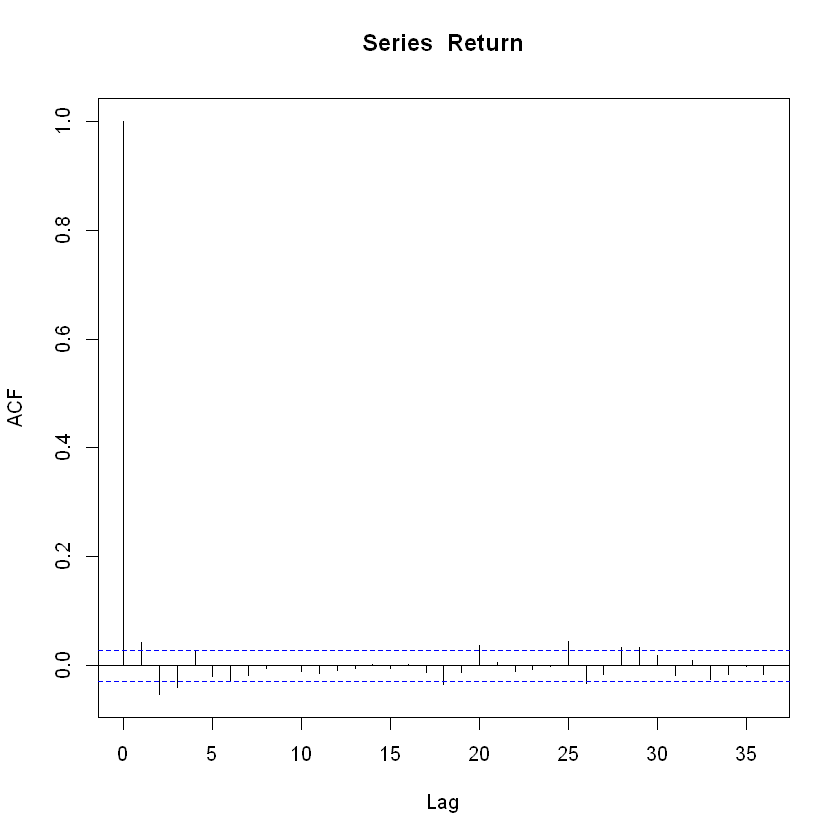

In [30]:
#ACF plot
acf(Return)

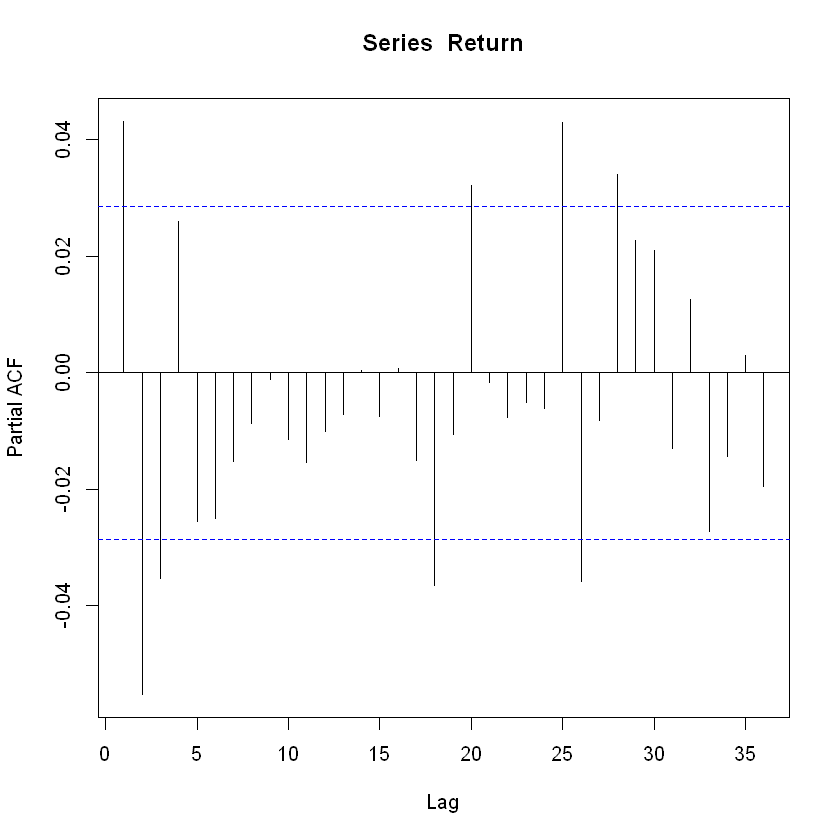

In [31]:
#PACF plot
pacf(Return)

# 4.Fitting of Univaraite Timeseries Models

## (i) Estimation of AR models

For a given time series Returns we can fit the autoregressive (AR) model using the arima() command and setting order equal to c(1, 0, 0). Note for reference that an AR model is an
ARIMA(1, 0, 0) model.

In [32]:
#Fitting the AR Model to the time series
AR <- arima(Return, order = c(1,0,0))
print(AR)


Call:
arima(x = Return, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.0432      4e-04
s.e.  0.0146      3e-04

sigma^2 estimated as 0.0004723:  log likelihood = 11319.65,  aic = -22633.3


### ACF Curve of Fittted Model

In [61]:
AR_fit <- Return - residuals(AR)

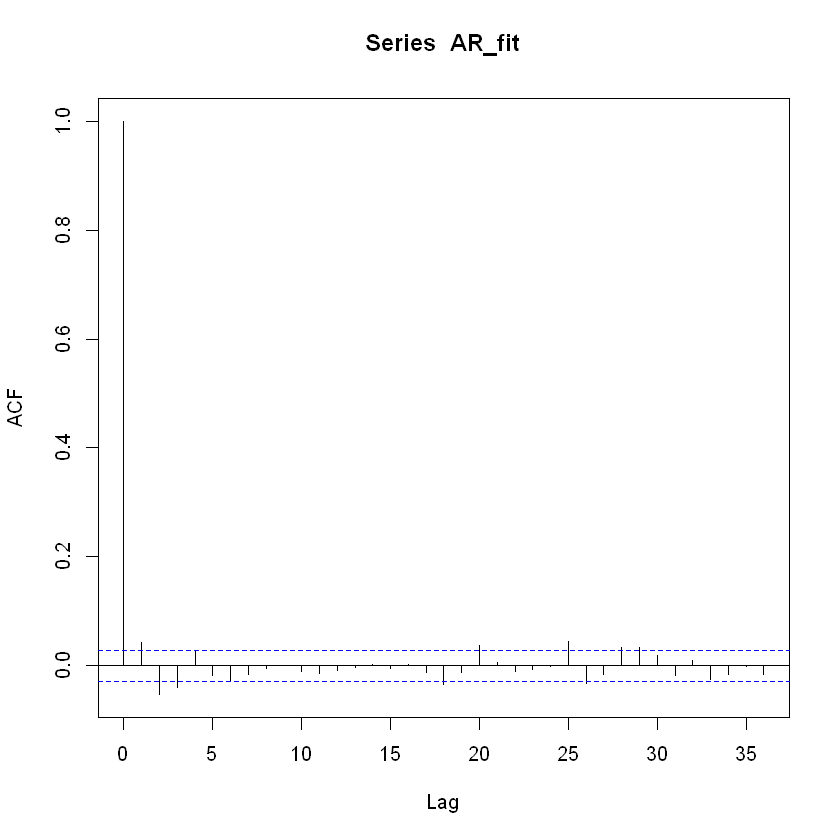

In [62]:
acf(AR_fit)

# (ii)Estimation of MA Model


We can fit the simple moving average (MA) model using arima(…, order = c(0, 0, 1)). Note for reference that an MA model is an ARIMA(0, 0, 1) model.


In [63]:
#Fitting the MA model to Returns
MA<- arima(Return, order = c(0,0,1))
print(MA)


Call:
arima(x = Return, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.0481      4e-04
s.e.  0.0153      3e-04

sigma^2 estimated as 0.0004722:  log likelihood = 11320.16,  aic = -22634.33


In [64]:
MA_fit <- Return - residuals(MA)

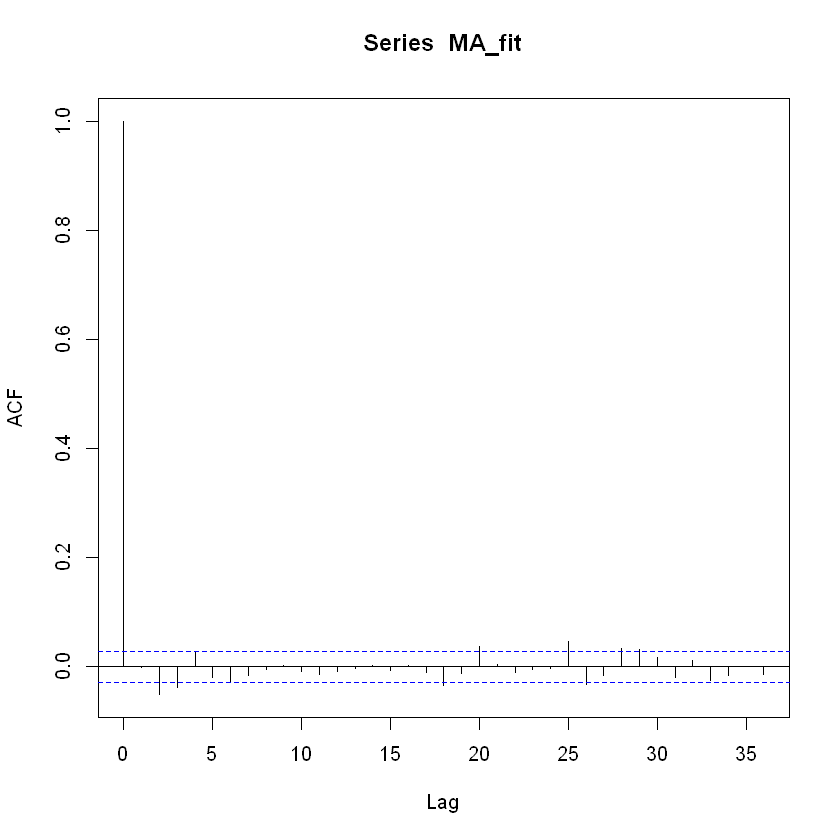

In [65]:
acf(MA_fit)


# (iii) Estimation of ARMA Models

We can fit ARMA model using arima(…, order = c(1,0,1)). Note for reference that an ARMA model is an ARIMA(1, 0, 1) model.


In [66]:
#Fitting the MA model to Returns
arma <- arima(Return, order = c(1,0,1))
print(arma)


Call:
arima(x = Return, order = c(1, 0, 1))

Coefficients:
          ar1     ma1  intercept
      -0.2772  0.3284      4e-04
s.e.   0.1394  0.1366      3e-04

sigma^2 estimated as 0.0004719:  log likelihood = 11321.94,  aic = -22635.87


In [67]:
arma_fit <- Return - resid(arma)

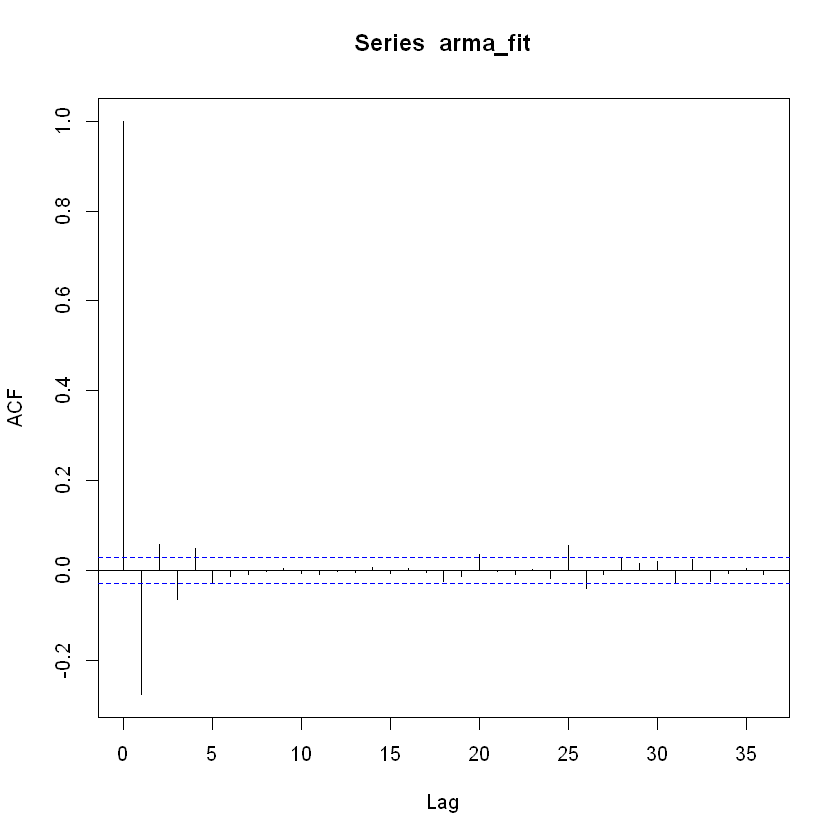

In [68]:
acf(arma_fit)

# (iv) ARIMA Models

ARIMA (autoregressive integrated moving average) is a commonly used technique utilized to fit time series data and forecasting. It is a generalized version of ARMA (autoregressive
moving average) process, where the ARMA process is applied for a differenced version of the data rather than original.
Three numbers p, d and q specify ARIMA model and the ARIMA model is said to be of order (p,d,q). Here p, d and q are the orders of AR part, Difference and the MA part respectively.

In [70]:
arima_1=arima(Return, order=c(1,1,1))
print(arima_1)


Call:
arima(x = Return, order = c(1, 1, 1))

Coefficients:
         ar1     ma1
      0.0434  -1.000
s.e.  0.0146   0.001

sigma^2 estimated as 0.0004724:  log likelihood = 11312.56,  aic = -22619.12


In [71]:
arima_fit_1 <- Return - resid(arima_1)

In [72]:
arima_fit_1 <- Return - resid(arima_1)

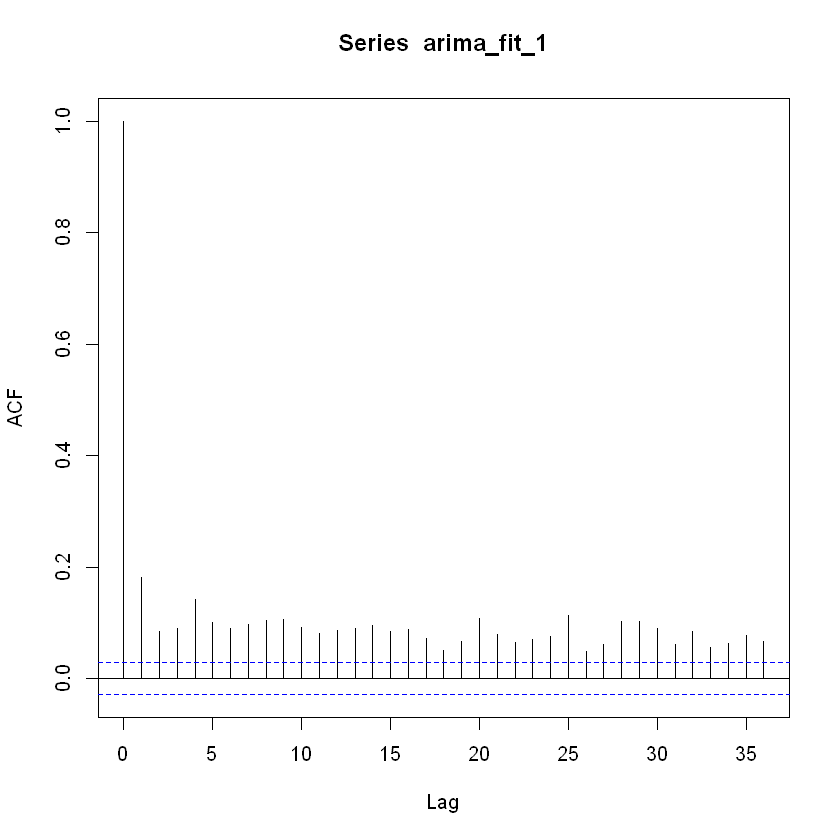

In [74]:
acf(arima_fit_1)

# Selction of Best Model

Once we have got the models ready we must answer the important question: Should we choose AR or MA or ARMA process? Goodness of fit such as an Information criteria is an method to help
us make the decision. Specifically Akaike information criterion (AIC) and Bayesian information criterion (BIC) are used for Time series Models. All factors being equal, a model that
produces a lower AIC or BIC than another model is considered a better fit.

In [75]:
AIC(AR)

[1] -22633.3

In [76]:
AIC(MA)

[1] -22634.33

In [78]:
AIC(arma)

[1] -22635.87

In [79]:
AIC(arima_1)

[1] -22619.12

# End of Lecture